# Problem 1: Heart disease dataset and classification algorithms


This notebooks contains some comments indicated by a '#'. For more detailed information and explanations see the readme file. 

In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import math


# Exploration of dataset and some data analysis

In [318]:
heart_data_01 = pd.read_csv(r'C:\Users\steve\OneDrive\Bureaublad\Karlstad university\Exam files\cleaned_merged_heart_dataset.csv', delimiter = ',')
display(heart_data_01)


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [320]:
#checking the datatypes of all the variables before doing the data analysis 
heart_data_01.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [322]:
heart_data_01.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [324]:
# check for missing values in the dataset and list them
heart_data_01.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [326]:
my_correlation = heart_data_01.corr(method="spearman")['target']
sorted = my_correlation.sort_values(key=abs)
print(sorted)

fbs        -0.032491
trestbps   -0.079220
chol       -0.096207
restecg     0.142389
age        -0.169950
sex        -0.196214
thalachh    0.304525
oldpeak    -0.313584
exang      -0.315084
thal       -0.315449
ca         -0.323934
cp          0.335938
slope       0.361375
target      1.000000
Name: target, dtype: float64


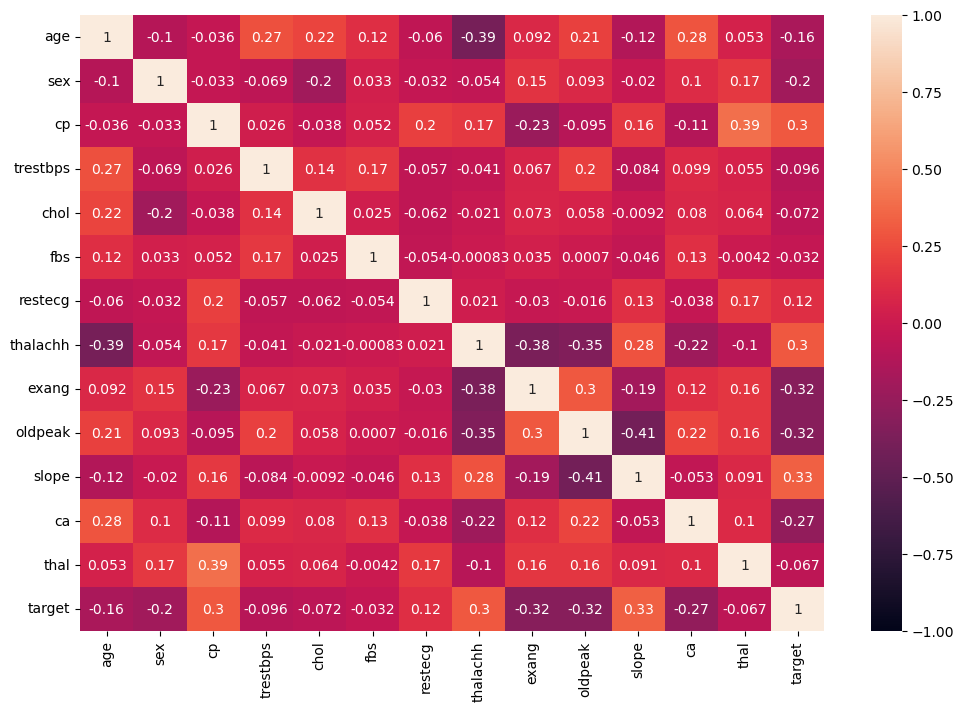

In [328]:
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heart_data_01.corr(), vmin=-1, vmax=1, annot=True)


In [330]:
# additional check on data completeness
print(heart_data_01.to_string())

      age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  slope  ca  thal  target
0      63    1   3       145   233    1        0       150      0      2.3      0   0     1       1
1      37    1   2       130   250    0        1       187      0      3.5      0   0     2       1
2      41    0   1       130   204    0        0       172      0      1.4      2   0     2       1
3      56    1   1       120   236    0        1       178      0      0.8      2   0     2       1
4      57    0   0       120   354    0        1       163      1      0.6      2   0     2       1
5      57    1   0       140   192    0        1       148      0      0.4      1   0     1       1
6      56    0   1       140   294    0        0       153      0      1.3      1   0     2       1
7      44    1   1       120   263    0        1       173      0      0.0      2   0     3       1
8      52    1   2       172   199    1        1       162      0      0.5      2   0     3       1


## Reshaping the dataframe with feature engineering

In [332]:
heart_data_02 = heart_data_01.drop(columns=['fbs', 'trestbps', 'chol', 'restecg', 'age', 'sex', 'thalachh']) 

In [334]:
heart_data_02['cpslope'] = heart_data_02['cp'] + heart_data_02['slope']
heart_data_02['thalca'] = heart_data_02['thal'] + heart_data_02['ca']
heart_data_02['oldpeakca'] = heart_data_02['oldpeak'] + heart_data_02['ca']
heart_data_02['oldpeakthalca'] = heart_data_02['thal'] + heart_data_02['ca'] + heart_data_02['oldpeak']

cs_column = heart_data_02.pop('cpslope')
heart_data_02.insert(5, cs_column.name, cs_column)

tc_column = heart_data_02.pop('thalca')
heart_data_02.insert(7, tc_column.name, tc_column)

oc_column = heart_data_02.pop('oldpeakca')
heart_data_02.insert(8, oc_column.name, oc_column)

tco_column = heart_data_02.pop('oldpeakthalca')
heart_data_02.insert(9, tco_column.name, tco_column)



In [336]:
my_correlation = heart_data_02.corr(method="spearman")['target']
sorted = my_correlation.sort_values(key=abs)
print(sorted)

oldpeak         -0.313584
exang           -0.315084
thal            -0.315449
ca              -0.323934
cp               0.335938
slope            0.361375
oldpeakca       -0.387672
thalca          -0.396298
cpslope          0.410856
oldpeakthalca   -0.426336
target           1.000000
Name: target, dtype: float64


In [338]:
heart_data_02

,cp,exang,oldpeak,slope,ca,cpslope,thal,thalca,oldpeakca,oldpeakthalca,target
0,3,0,2.3,0,0,3,1,1,2.3,3.3,1
1,2,0,3.5,0,0,2,2,2,3.5,5.5,1
2,1,0,1.4,2,0,3,2,2,1.4,3.4,1
3,1,0,0.8,2,0,3,2,2,0.8,2.8,1
4,0,1,0.6,2,0,2,2,2,0.6,2.6,1
...,...,...,...,...,...,...,...,...,...,...,...
1883,0,1,1.9,2,1,2,3,4,2.9,5.9,0
1884,0,1,1.8,1,2,1,3,5,3.8,6.8,0
1885,3,0,0.8,2,2,5,2,4,2.8,4.8,0
1886,1,0,0.0,2,1,3,2,3,1.0,3.0,0


# Machine learning models

## Logistic Regression model

In [342]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [344]:
predictivecolumns=['slope','cpslope','oldpeakca','thalca','oldpeakca'] 

X=heart_data_02[predictivecolumns]
y=heart_data_02['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [346]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.542518
         Iterations: 35
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: target           Pseudo R-squared: 0.217      
Date:               2025-01-09 17:42 AIC:              2056.5488  
No. Observations:   1888             BIC:              2078.7219  
Df Model:           3                Log-Likelihood:   -1024.3    
Df Residuals:       1884             LL-Null:          -1307.5    
Converged:          0.0000           LLR p-value:      1.8728e-122
No. Iterations:     35.0000          Scale:            1.0000     
--------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
--------------------------------------------------------------------
slope          0.2039     0.0708   2.8818   0.0040   0.0652   0.3426
cpslope        0.5521     0.0582   9.4800   0.0000   0.4379   0.6662
oldpeakca   

C:\Users\steve\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [348]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [350]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [352]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[190  83]
 [ 57 237]]


In [354]:
# Precision, Recall, F1 score and support measurement
# The support is the total number of occurences of each class

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       273
           1       0.74      0.81      0.77       294

    accuracy                           0.75       567
   macro avg       0.75      0.75      0.75       567
weighted avg       0.75      0.75      0.75       567



## KNN

In [357]:
from sklearn.neighbors import KNeighborsClassifier

In [359]:
predictivecolumns=['slope','cpslope','oldpeakca','thalca','oldpeakca'] 

X=heart_data_02[predictivecolumns]
y=heart_data_02['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [364]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)

KNeighborsClassifier()

In [366]:
y_pred = knn.predict(X_test)
print('Accuracy of the knn classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of the knn classifier on test set: 0.87


In [368]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[238  59]
 [ 20 307]]


In [370]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       297
           1       0.84      0.94      0.89       327

    accuracy                           0.87       624
   macro avg       0.88      0.87      0.87       624
weighted avg       0.88      0.87      0.87       624



## Naive Bayes

In [373]:
from sklearn.naive_bayes import GaussianNB

In [375]:
predictivecolumns=['slope','cpslope','oldpeakca','thalca','oldpeakca'] 

X=heart_data_02[predictivecolumns]
y=heart_data_02['target']



In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [379]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [381]:
print('Accuracy of the naive bayes classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of the naive bayes classifier on test set: 0.75


In [383]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[187 110]
 [ 48 279]]


In [385]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70       297
           1       0.72      0.85      0.78       327

    accuracy                           0.75       624
   macro avg       0.76      0.74      0.74       624
weighted avg       0.75      0.75      0.74       624



## Random Forest

In [388]:
from sklearn.ensemble import RandomForestClassifier


In [390]:
predictivecolumns=['slope','cpslope','oldpeakca','thalca','oldpeakca'] 

X=heart_data_02[predictivecolumns]
y=heart_data_02['target']


In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [394]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [396]:
print('Accuracy of the random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of the random forest classifier on test set: 0.89


In [398]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[264  33]
 [ 36 291]]


In [400]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       297
           1       0.90      0.89      0.89       327

    accuracy                           0.89       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.89      0.89      0.89       624



## Support Vector Machine

In [403]:
from sklearn.svm import SVC

In [405]:
predictivecolumns=['slope','cpslope','oldpeakca','thalca','oldpeakca'] 

X=heart_data_02[predictivecolumns]
y=heart_data_02['target']

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [409]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [411]:
print('Accuracy of the SVM classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of the SVM classifier on test set: 0.84


In [413]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[246  51]
 [ 46 281]]


In [415]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       297
           1       0.85      0.86      0.85       327

    accuracy                           0.84       624
   macro avg       0.84      0.84      0.84       624
weighted avg       0.84      0.84      0.84       624



End of notebook: Heart_Disease prediction